In [1]:
%matplotlib inline

import numpy as np
import cProfile
import random
from SNN import *
from NN import *
from WAVreader import *
from copy import deepcopy
from random import shuffle
from scipy.io import wavfile
from scipy.fftpack import fft, dct
from pylab import *
from numpy import dot, outer
from sklearn.decomposition import PCA

29.207
Scaled 963 windows down to 696
Finished file 6-1.wav
29.191
Scaled 1285 windows down to 830
Finished file 3-1.wav

Final data set consists of 1518 windows over 1 classes


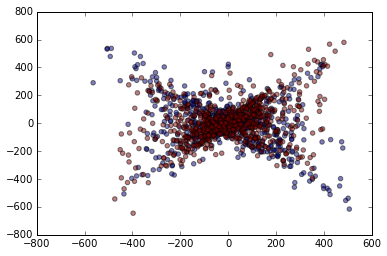

In [4]:
c = 3
filelist = ['6-1.wav',
            '3-1.wav'
            ]
data = WAVreader(filelist, [], 0.1)

X = [dat[0] for dat in data.concatset]
labels = [(dat[1]+0.0)/len(data.dataset) for dat in data.concatset]
pca = PCA(n_components=2)
pca.fit(X)
newX = pca.transform(X)
scatter([x[0] for x in newX], [x[1] for x in newX],c=labels,alpha=0.5)


In [16]:
trainset = []
testset = []
for i in xrange(len(data)):
    if i%10 == 0: testset.append(data[i])
    else: trainset.append(data[i])
print (len(data), len(testset))

(2421, 243)


In [4]:
NTN = ShallowNeuralNetwork(hidden_dim=13)#input_dim=26, hidden_dim=13)
# cProfile.run('NTN.train(trainset, maxiter=41, alpha=0.0001, lmbda=0.001, display_progress=True)')
NTN.train(trainset, maxiter=51, alpha=0.0001, lmbda=0.001, display_progress=True)

ValueError: shapes (2,) and (1,14) not aligned: 2 (dim 0) != 1 (dim 0)

In [5]:
# 2-class, alpha=.0001, lmbda=0, t=61
print NTN.accuracy(trainset), NTN.accuracy(testset)

0.892276422764 0.636363636364


In [5]:
# 2-class, alpha=.0001, lmbda=0, t=61
# print NTN.accuracy(trainset), NTN.accuracy(testset)

0.99433106576 0.801020408163


In [26]:
SNN = SoftmaxNeuralNetwork(output_dim=c)
# print data[0][1]
# SNN.forward_propagation(data[0][0])
# print SNN.predictions
# SNN.backward_propagation(data[0][1])
# cProfile.run('SNN.train(trainset, maxiter=101, alpha=0.001, lmbda=.00001, display_progress=True)')
SNN.train(trainset, maxiter=501, alpha=0.0001, lmbda=.00001, display_progress=True)

completed iteration 0; error is 1299.0; size is 1.57340985593
completed iteration 10; error is 1234.0; size is 38.3496599072
completed iteration 20; error is 1300.0; size is 111.325856106
completed iteration 30; error is 1291.0; size is 164.202686321
completed iteration 40; error is 1255.0; size is 193.142812665
completed iteration 50; error is 1295.0; size is 201.390267801
completed iteration 60; error is 1278.0; size is 202.36712971
completed iteration 70; error is 1266.0; size is 195.429201479
completed iteration 80; error is 1276.0; size is 185.223558445
completed iteration 90; error is 1248.0; size is 173.256888562
completed iteration 100; error is 1211.0; size is 171.228908517
completed iteration 110; error is 1223.0; size is 171.713996219
completed iteration 120; error is 1201.0; size is 168.168567113
completed iteration 130; error is 1168.0; size is 166.160675981
completed iteration 140; error is 1180.0; size is 167.268469107
completed iteration 150; error is 1158.0; size is 16

In [14]:
# 3-class, alpha=.0002, lmbda=.0001, t=61
print SNN.accuracy(trainset), SNN.accuracy(testset)

0.77994011976 0.563758389262


In [27]:
# 5-class, alpha=.002, lmbda=.0001, t=401
print SNN.accuracy(trainset), SNN.accuracy(testset)

0.258494031221 0.230452674897


In [ ]:
#SIMPLE TIMER
cProfile.run("rate, x = wavfile.read('5-1.wav');")
print rate, len(x)

         34665 function calls (34281 primitive calls) in 0.040 seconds

   Random listing order was used

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 transforms.py:999(_get_minposy)
       10    0.000    0.000    0.000    0.000 cbook.py:363(__init__)
        1    0.000    0.000    0.000    0.000 figure.py:99(bubble)
      197    0.000    0.000    0.000    0.000 {method 'itervalues' of 'dict' objects}
       20    0.000    0.000    0.000    0.000 artist.py:261(get_transform)
       16    0.000    0.000    0.000    0.000 ticker.py:390(__init__)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:53(take)
    81/78    0.000    0.000    0.000    0.000 {hash}
       10    0.000    0.000    0.000    0.000 cbook.py:495(connect)
       95    0.000    0.000    0.000    0.000 text.py:1020(set_text)
        2    0.000    0.000    0.000    0.000 lines.py:542(set_axes)
      3/2    0.000    0.000    0.000    0.000 tr

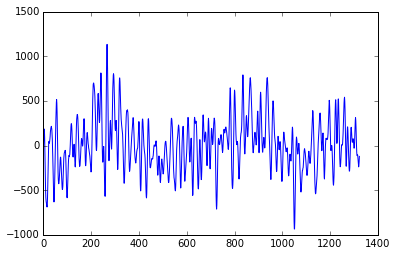

In [28]:
#MORE COMPLEX TIMER - BUT POSSIBLY CAN EXTRACT INFO INTO VARIABLES
import cProfile, pstats, StringIO
pr = cProfile.Profile()
pr.enable()
pr.run("rate, x = wavfile.read('5-1.wav');")
pr.disable()
s = StringIO.StringIO()
ps = pstats.Stats(pr, stream=s).strip_dirs()
ps.print_stats()
print s.getvalue()